In [12]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [13]:
cities = ['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Chicago', 'Cincinnati',
          'Dallas', 'Detroit', 'Fort Worth', 'Los Angeles', 'New York City',
          'Philadelphia', 'Phoenix', 'San Francisco', 'Seattle', 'Washington DC', 'Milwaukee',
          'Portland', 'Denver', 'Houston', 'Nashville', 'Louisville', 'Kansas City', 'Raleigh',
          'Buffalo', 'Virginia Beach', 'Little Rock']

In [14]:
df_ = pd.read_csv('final/final_incidents_2021-05-28.csv')
df_['count'] = 1

category_3 = df_['category_3'].unique()
category_2 = df_['category_2'].unique()

In [15]:
df = df_.groupby(['city', 'category_2']).sum().reset_index()
pivot = df.pivot(index='city', columns='category_2', values='count').reset_index()
pivot.columns.name = None

counts = df.groupby('city').sum().reset_index()
counts

,city,count
0,Atlanta,85337
1,Austin,152892
2,Baltimore,101253
3,Boston,88936
4,Buffalo,31283
5,Chicago,516614
6,Cincinnati,63966
7,Dallas,170799
8,Denver,94579
9,Detroit,160386


In [16]:
def fn(row): 
    total = counts[counts['city'] == row['city']]['count'].values[0]
    for c in category_2: 
        row[c] = row[c] / total
    return row

pd.set_option('precision',3)
pivot.apply(fn, axis = 1).style.background_gradient(cmap='Greens', axis=1)

,city,Arson,Assault,Burglary,Drug,Gambling,Homicide,Other Property Crime,Rape,Robbery,Theft,White Collar
0,Atlanta,nan,0.073,0.106,nan,nan,0.004,nan,nan,0.036,0.782,nan
1,Austin,0.001,0.221,0.061,0.077,0.000,0.001,0.110,0.005,0.015,0.447,0.061
2,Baltimore,0.003,0.302,0.124,nan,nan,0.007,nan,0.007,0.114,0.444,nan
3,Boston,0.000,0.197,0.041,0.100,nan,0.001,0.251,0.001,0.027,0.298,0.082
4,Buffalo,nan,0.231,0.152,nan,nan,0.004,nan,0.009,0.059,0.545,nan
5,Chicago,0.002,0.299,0.045,0.061,0.001,0.002,0.143,0.002,0.050,0.308,0.088
6,Cincinnati,0.000,0.189,0.128,nan,nan,0.004,0.165,0.012,0.064,0.429,0.010
7,Dallas,0.002,0.124,0.118,0.037,0.000,0.001,0.149,0.000,0.065,0.470,0.034
8,Denver,0.002,0.156,0.095,0.129,0.000,0.001,0.010,0.012,0.027,0.535,0.031
9,Detroit,0.010,0.318,0.097,0.028,0.000,0.004,0.144,0.011,0.030,0.261,0.097


In [17]:
pd.reset_option('precision')

In [18]:
assault = df_[df_['category_2'] == 'Assault']
assault = assault.groupby(['city', 'std_date']).sum().reset_index()

In [19]:
assault['std_date'] = pd.to_datetime(assault['std_date'])

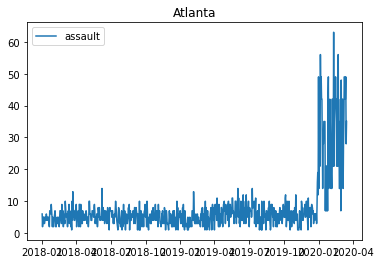

<Figure size 432x288 with 0 Axes>

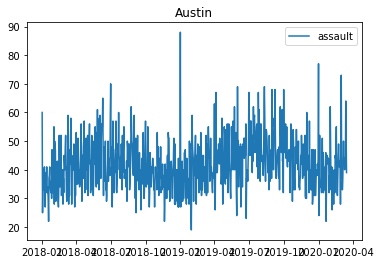

<Figure size 432x288 with 0 Axes>

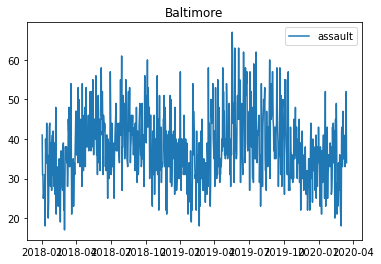

<Figure size 432x288 with 0 Axes>

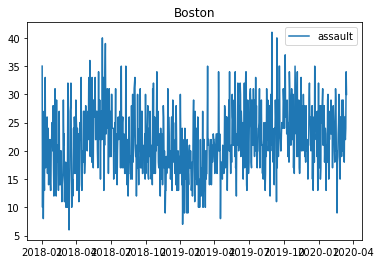

<Figure size 432x288 with 0 Axes>

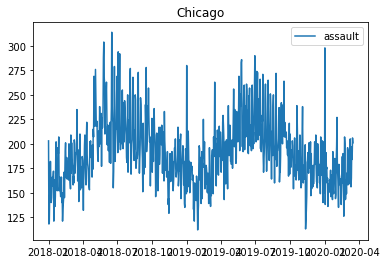

<Figure size 432x288 with 0 Axes>

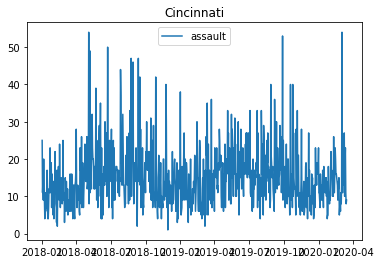

<Figure size 432x288 with 0 Axes>

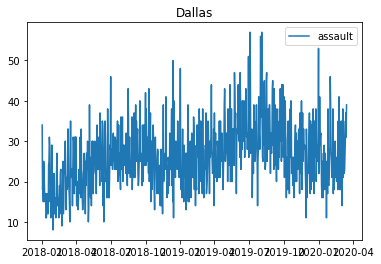

<Figure size 432x288 with 0 Axes>

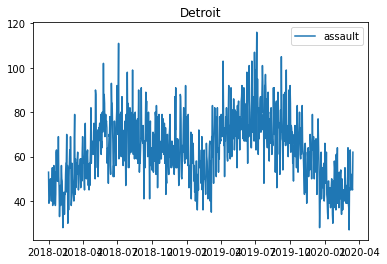

<Figure size 432x288 with 0 Axes>

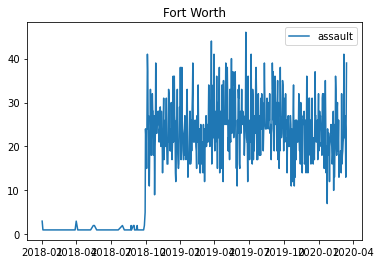

<Figure size 432x288 with 0 Axes>

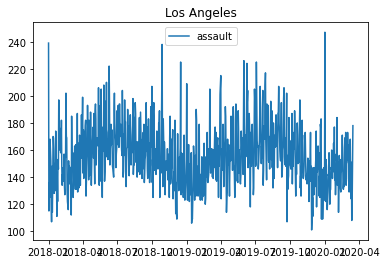

<Figure size 432x288 with 0 Axes>

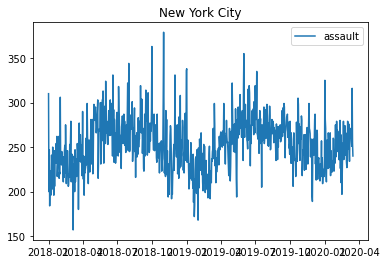

<Figure size 432x288 with 0 Axes>

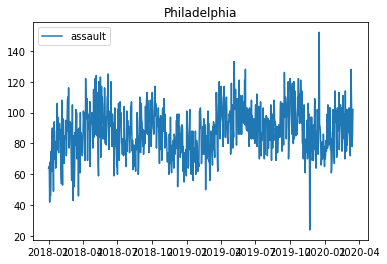

<Figure size 432x288 with 0 Axes>

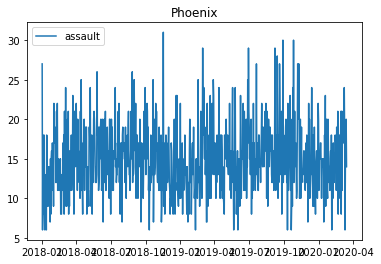

<Figure size 432x288 with 0 Axes>

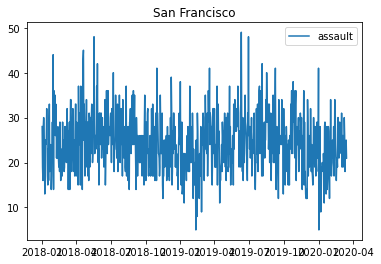

<Figure size 432x288 with 0 Axes>

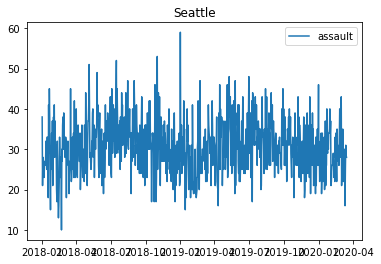

<Figure size 432x288 with 0 Axes>

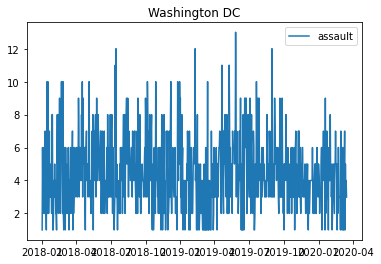

<Figure size 432x288 with 0 Axes>

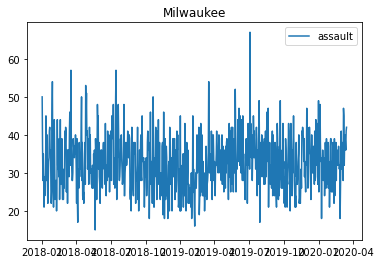

<Figure size 432x288 with 0 Axes>

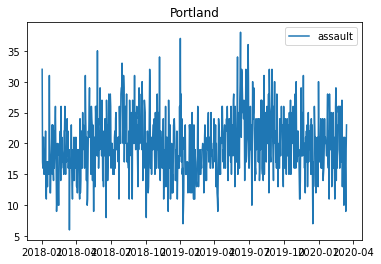

<Figure size 432x288 with 0 Axes>

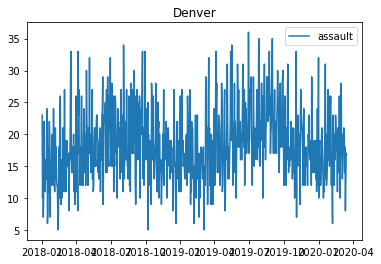

<Figure size 432x288 with 0 Axes>

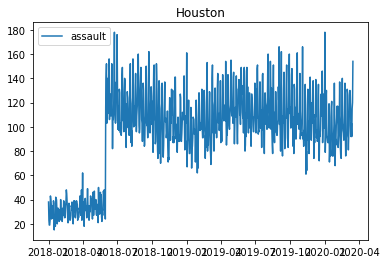

<Figure size 432x288 with 0 Axes>

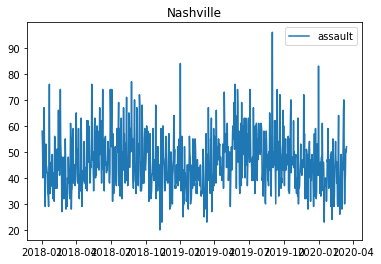

<Figure size 432x288 with 0 Axes>

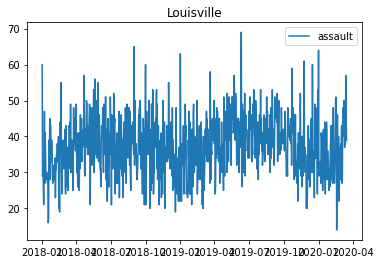

<Figure size 432x288 with 0 Axes>

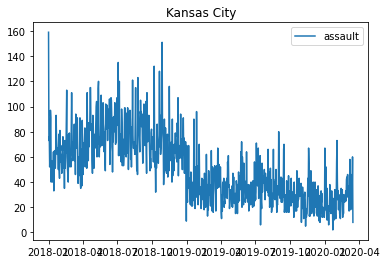

<Figure size 432x288 with 0 Axes>

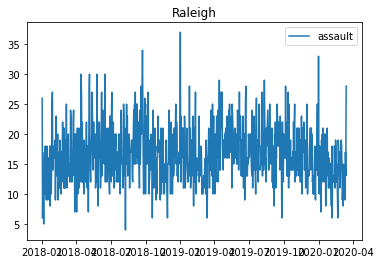

<Figure size 432x288 with 0 Axes>

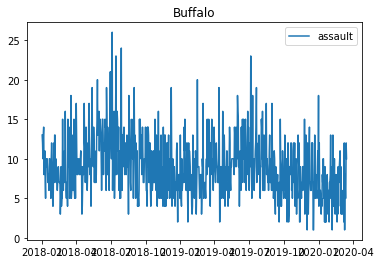

<Figure size 432x288 with 0 Axes>

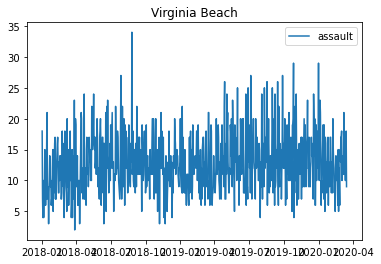

<Figure size 432x288 with 0 Axes>

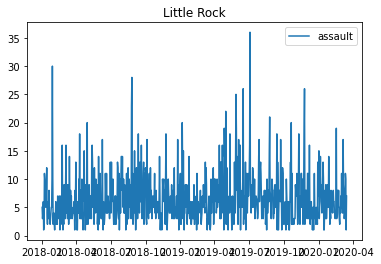

<Figure size 432x288 with 0 Axes>

In [20]:
for i, city in enumerate(cities): 
    city_analysis = assault[assault['city'] == city]
    fig, ax = plt.subplots()
#     fig.set_size_inches(12, 6)
    
    plt.title(city)
    plt.plot(city_analysis['std_date'], city_analysis['count'], label='assault')
    ax.legend()
    plt.show()
    
#     plt.savefig('viz/img/time_series/' + cities_file_names[i] + '_time_series.png')
    plt.cla()
    plt.clf()

Anomalies: 

- Atlanta: 2020-01
Move from old RMS to new RMS in 2020 (https://www.atlantapd.org/Home/Components/Calendar/Event/703/20?toggle=all&folder=48)


- Fort Worth: 2018-10
UCR to NIBRS? 
can't find exact date change, but 2018 is around when they made the change: https://www.theiacp.org/sites/default/files/all/f-h/FortWorthTransitionSummary_Jan-2018.pdf


- Houston: 2018-06
UCR to NIBRS?
can't find exact date change, but 2018 is around when they made the change


- Kansas City: mid 2019: data was coded from ucr to nibrs; proabbly affecting crime trends. suggest removing. 


